In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [68]:
import csv
bank1=pd.read_csv("C:/Users/Damanjeet kaur.LAPTOP-B5CHJ9SC/Downloads/bank-full.csv",sep=';')
bank=pd.DataFrame(bank1)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [69]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [86]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
bank[('job')]= label_encoder.fit_transform(bank[('job')]) 
bank[('marital')]=label_encoder.fit_transform(bank[('marital')])
bank[('education')]= label_encoder.fit_transform(bank[('education')]) 
bank[('default')]= label_encoder.fit_transform(bank[('default')]) 
bank[('housing')]= label_encoder.fit_transform(bank[('housing')]) 
bank[('loan')]= label_encoder.fit_transform(bank[('loan')]) 
bank[('contact')]= label_encoder.fit_transform(bank[('contact')]) 
bank[('month')]= label_encoder.fit_transform(bank[('month')]) 
bank[('poutcome')]= label_encoder.fit_transform(bank[('poutcome')]) 
bank[('y')]= label_encoder.fit_transform(bank[('y')]) 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [87]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [88]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [89]:
bank.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [90]:
x=bank.iloc[:,0:16]
y=bank["y"]

In [91]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [92]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler_x=scaler.fit_transform(x)

## building model

In [94]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [95]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
y_pred_df=pd.DataFrame({'actual':y,'pred prob':classifier.predict(x)})
y_pred_df

,actual,pred prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


### Confusion matrix for model accuracy

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39279   643]
 [ 4437   852]]


In [98]:
((39279+852)/(39279+643+4437+852))*100

88.76379642122492

## model is giving 88% accuracy

#### classification report

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

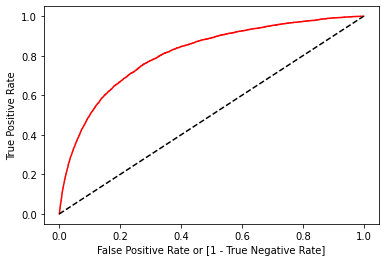

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
